# Aufgabe 2: Region Growing
Mit *Region Growing* wird eine Klasse von Verfahren bezeichnet, die ein Bild derart in zusammenhängende Regionen zerteilen, sodass jeder Bildpunkt zu genau einer Region gehört.
Gestartet wird dabei mit sogenannten *Seed-Punkten*, von denen aus für alle benachbarten Punkte überprüft wird, ob sie zum Startpunkt passen.
Dies wird iterativ so lange wiederholt, wie die Region noch wächst.

Als Homogenitätskriterium können komplexe Texturanalysen durchgeführt oder im einfachsten Fall Ähnlichkeiten von Grauwerten überprüft werden.
Als formales Homogenitätskriterium $h$ für Grauwerte $v$ wäre beispielsweise
\begin{align}
 h(v) = \begin{cases} 1, & |v-v_\text{seed}| < \theta \\ 0, & \text{sonst}\end{cases}
\end{align}
denkbar.
Dabei bezeichnet $\theta$ einen gegebenen Schwellwert und $v_\text{seed}$ den Grauwert des Startpunktes.
Um Startpunkte zu finden, kann man z.\,B. in der linken oberen Ecke des Bildes ein erstes Region Growing beginnen und dann sukzessive alle noch keiner Region zugewiesenen Punkte als neue Startpunkte verwenden. Prinzipiell sind aber natürlich auch ganz andere Initialisierungen möglich.

Implementieren Sie eine Python-Funktion, die mittels Region Growing ein gegebenes Grauwertbild in zusammenhängende Regionen teilt!
Erzeugen Sie dabei ein Ausgabebild, auf dem die Regionen entweder farblich kodiert sind oder die Regionen jeweils als homogene Gebiete mit dem mittleren Grauwert der Region dargestellt werden!


## 0. Pfade, Pakete etc.

In [33]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import imageio
import numpy as np
import math
from skimage.transform import resize

In [34]:
image_filter = './../material/Bilder/Mars.jpg'

## 1. Definition der Parameter
Für das Region Growing ist das **Homogenitätskriterium** $h$ essentiell. Definieren Sie $h$ als Funktion bzw. Lambda-Ausdruck, der von $v$ und $v_{\textrm{seed}}$ abhängt und durch den Schwellwert $\theta$ konfigurierbar ist. Liefern Sie `True` zurück, falls das Kriterium erfüllt ist und anderfalls `False`.

In [35]:
theta = 0.1
h = lambda v, vseed: True if np.abs(v-vseed) < theta else False

## 2. Laden des Bildes

In [36]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)
image = resize(image, (50, 50))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


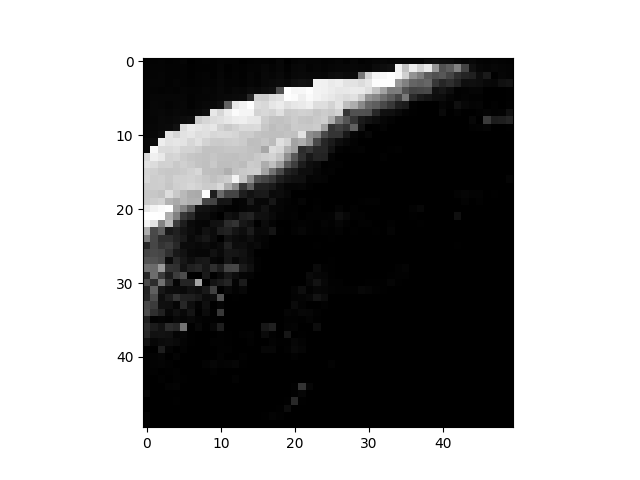

In [37]:
plt.figure()
plt.imshow(image, cmap='gray')

In [38]:
image_max = np.float32(np.max(image))
image_min = np.float32(np.min(image))
image = (np.float32(image) - image_min)/(image_max - image_min)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


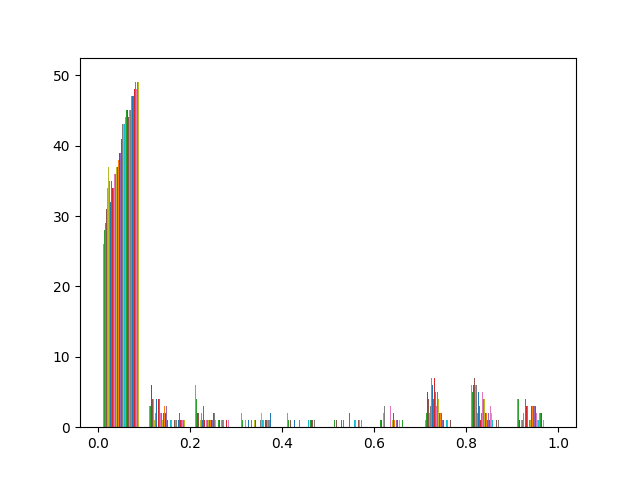

([array([25.,  7.,  4.,  1.,  2.,  0.,  1.,  3.,  4.,  3.]),
  array([26.,  3.,  6.,  2.,  2.,  0.,  0.,  1.,  6.,  4.]),
  array([28.,  3.,  4.,  1.,  1.,  1.,  1.,  2.,  5.,  4.]),
  array([29.,  6.,  2.,  0.,  0.,  0.,  1.,  5.,  6.,  1.]),
  array([29.,  6.,  3.,  0.,  0.,  1.,  2.,  3.,  5.,  1.]),
  array([31.,  4.,  2.,  0.,  1.,  1.,  0.,  4.,  7.,  0.]),
  array([34.,  4.,  0.,  1.,  0.,  0.,  2.,  2.,  6.,  1.]),
  array([36.,  1.,  0.,  0.,  0.,  0.,  3.,  3.,  6.,  1.]),
  array([37.,  1.,  1.,  0.,  0.,  0.,  0.,  6.,  4.,  1.]),
  array([35.,  2.,  2.,  0.,  0.,  0.,  0.,  7.,  2.,  2.]),
  array([32.,  4.,  1.,  1.,  1.,  0.,  0.,  6.,  5.,  0.]),
  array([32.,  4.,  2.,  1.,  0.,  0.,  2.,  4.,  3.,  2.]),
  array([35.,  0.,  3.,  0.,  0.,  1.,  0.,  4.,  3.,  4.]),
  array([34.,  4.,  1.,  0.,  0.,  0.,  0.,  7.,  1.,  3.]),
  array([34.,  4.,  0.,  1.,  0.,  1.,  0.,  5.,  2.,  3.]),
  array([37.,  1.,  0.,  1.,  0.,  0.,  0.,  5.,  5.,  1.]),
  array([36.,  2.,  1., 

([array([25.,  7.,  4.,  1.,  2.,  0.,  1.,  3.,  4.,  3.]),
  array([26.,  3.,  6.,  2.,  2.,  0.,  0.,  1.,  6.,  4.]),
  array([28.,  3.,  4.,  1.,  1.,  1.,  1.,  2.,  5.,  4.]),
  array([29.,  6.,  2.,  0.,  0.,  0.,  1.,  5.,  6.,  1.]),
  array([29.,  6.,  3.,  0.,  0.,  1.,  2.,  3.,  5.,  1.]),
  array([31.,  4.,  2.,  0.,  1.,  1.,  0.,  4.,  7.,  0.]),
  array([34.,  4.,  0.,  1.,  0.,  0.,  2.,  2.,  6.,  1.]),
  array([36.,  1.,  0.,  0.,  0.,  0.,  3.,  3.,  6.,  1.]),
  array([37.,  1.,  1.,  0.,  0.,  0.,  0.,  6.,  4.,  1.]),
  array([35.,  2.,  2.,  0.,  0.,  0.,  0.,  7.,  2.,  2.]),
  array([32.,  4.,  1.,  1.,  1.,  0.,  0.,  6.,  5.,  0.]),
  array([32.,  4.,  2.,  1.,  0.,  0.,  2.,  4.,  3.,  2.]),
  array([35.,  0.,  3.,  0.,  0.,  1.,  0.,  4.,  3.,  4.]),
  array([34.,  4.,  1.,  0.,  0.,  0.,  0.,  7.,  1.,  3.]),
  array([34.,  4.,  0.,  1.,  0.,  1.,  0.,  5.,  2.,  3.]),
  array([37.,  1.,  0.,  1.,  0.,  0.,  0.,  5.,  5.,  1.]),
  array([36.,  2.,  1., 

In [49]:
plt.figure()
plt.hist(image)

## 3. Region Growing
Zunächst benötigen wir eine Hilfsfunktion `ex5_neighbors`, die uns zu einem bestimmten Bildpunkt bei bekannten Dimensionen des Bildes alle gültigen Indizes der unmittelbaren Nachbarbildpunkte liefert. Bedenken Sie die Bildränder!

In [40]:
def ex5_neighbors(point, image_shape):
    y, x = point
    ysize, xsize = image_shape
    neighbors = set([(x-1, y-1), (x-1, y), (x-1, y+1), (x, y+1), (x, y-1), (x+1, y+1), (x+1, y), (x+1, y-1)])
    left_x = set([(x-1, y), (x-1,  y+1), (x-1, y-1)])
    bottom_y = set([(x, y-1), (x+1, y-1), (x-1, y-1)])
    right_x = set([(x+1, y), (x+1, y+1), (x+1, y-1)])
    top_y = set([(x, y+1), (x+1, y+1), (x-1, y+1)])

    if (not x+1 < xsize):
        neighbors = neighbors.difference(right_x)
    if (not x-1 >= 0):
        neighbors = neighbors.difference(left_x)
    if (not y+1 < ysize):
        neighbors = neighbors.difference(top_y)
    if (not y-1 <= 0):
        neighnors = neighbors.difference(bottom_y)

    return set(neighbors)

Definieren Sie nun die Funktion `ex5_region_growing`, die die Aufgabe für ein bestimmtes Bild unter Verwendung des Homogenitätskriteriums $h$ löst. Dabei soll jedem Bildpunkt ein Regionenindex zugeordnet werden.

In [41]:
def find_seeds(image, c):
    seeds = []
    for j in range(0, image.shape[1]):
        for i in range(0, image.shape[0]):
            if c(image[i, j]):
                seeds.append((i, j))
    return seeds

In [42]:
def neighbors_criteria_check(image, i, j, h, seed_value):
    neighbors = list(ex5_neighbors((j, i), image.shape))
    neighbors_px_values = [image[n_i, n_j] for (n_i, n_j) in neighbors]
    neighbors_h = [h(px_value, seed_value) for px_value in neighbors_px_values]
    true_neighbors = [neighbors[k] for k in range(len(neighbors_h)) if (neighbors_h[k])]
    return true_neighbors

In [43]:
def ex5_region_growing(image, h):
    image_shape = image.shape
    output = np.zeros(shape = image_shape, dtype=np.int)
    
    # find seeds
    seed_criteria = lambda px_value: True if px_value > 0.99 else False
    seeds = find_seeds(image, seed_criteria)
    
    output = np.zeros(image.shape)
    
    for i in range(0, len(seeds)):
        seed_x = seeds[i][0]
        seed_y = seeds[i][1]
        seed_value = image[seed_x, seed_y]
        output[seed_x, seed_y] = i
        true_neighbors = neighbors_criteria_check(image, seed_x, seed_y, h, seed_value)
        if len(true_neighbors) > 0:
            visited = []
            to_visit = true_neighbors
            while (len(to_visit) > 0):
                next_neighbor = to_visit.pop(0)
                visited.append(next_neighbor)
                output[next_neighbor[0], next_neighbor[1]] = i
                true_neighbors = neighbors_criteria_check(image, next_neighbor[0], next_neighbor[1], h, seed_value)
                for neighbor in true_neighbors:
                    if neighbor not in visited:
                        to_visit.append(neighbor)
                
    return output

Nun wird die Region Growing-Funktion aufgerufen:

In [44]:
segmentation = ex5_region_growing(image, h)

Visualisieren Sie das Ergebnis nun, indem Sie die Segmentierung neben dem Originalbild darstellen. Wählen Sie eine geeignete Color Map, um die Indizes zu visualisieren.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


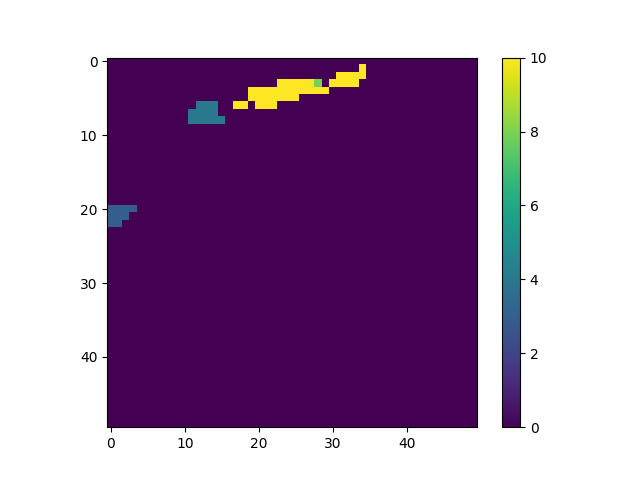

In [50]:
plt.figure()
plt.imshow(segmentation)
plt.colorbar()

Connect regions

In [51]:
def connect_regions(segmentation):
    connected_segmentation = np.copy(segmentation)
    for j in range(0, connected_segmentation.shape[1]):
        for i in range(0, connected_segmentation.shape[0]):
            current_id = connected_segmentation[i, j]
            if (current_id > 0):
                neighbors = ex5_neighbors((j, i), connected_segmentation.shape)
                for neighbor in neighbors:
                    neighbor_id = connected_segmentation[neighbor[0], neighbor[1]]
                    if (neighbor_id > 0):
                        # if there is a different id in the neighborhood
                        if (neighbor_id != current_id):
                            connected_segmentation[connected_segmentation == neighbor_id] = current_id
    return connected_segmentation

In [47]:
connected_segmentation = connect_regions(segmentation)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


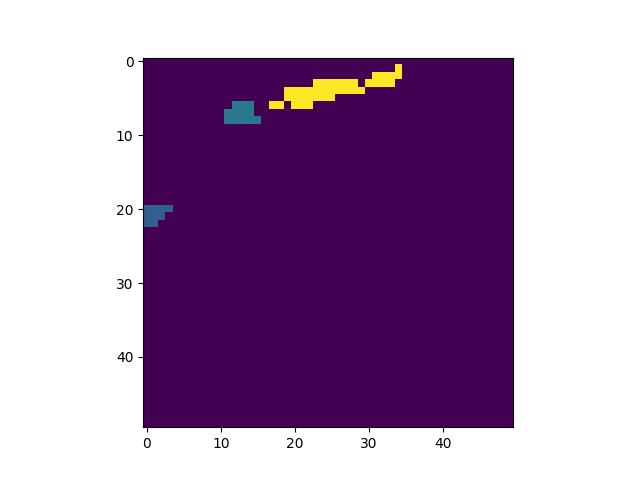

In [52]:
plt.figure()
plt.imshow(connected_segmentation)